<a href="https://colab.research.google.com/github/DaryaNaumova/Data-Analysis-and-Visualization_Naumova/blob/main/visualization_with_seaborn_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="https://github.com/cpearce/PythonDataScienceHandbook/blob/master/notebooks/figures/PDSH-cover-small.png?raw=1">

*This notebook contains an excerpt from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas; the content is available [on GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).*

*The text is released under the [CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode), and code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work by [buying the book](http://shop.oreilly.com/product/0636920034919.do)!*

<!--NAVIGATION-->
< [Geographic Data with Basemap](04.13-Geographic-Data-With-Basemap.ipynb) | [Contents](Index.ipynb) | [Further Resources](04.15-Further-Resources.ipynb) >

<a href="https://colab.research.google.com/github/cpearce/PythonDataScienceHandbook/blob/master/notebooks/04.14-Visualization-With-Seaborn.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>


# Visualization with Seaborn

Matplotlib оказался невероятно полезным и популярным инструментом визуализации, но даже заядлые пользователи признают, что он часто оставляет желать лучшего. Есть несколько обоснованных жалоб на Matplotlib, которые часто возникают:

До версии 2.0 настройки Matplotlib по умолчанию не были лучшим выбором. Он был основан на MATLAB примерно 1999 года, и это часто видно.
API Matplotlib относительно низкого уровня. Сложная статистическая визуализация возможна, но часто требует большого количества шаблонного кода.
Matplotlib появился раньше Pandas более чем на десятилетие, и поэтому не предназначен для использования с Pandas DataFrames. Чтобы визуализировать данные из Pandas DataFrame, необходимо извлечь каждый из них Seriesи часто объединять их в нужный формат. Было бы лучше иметь библиотеку построения графиков, которая может разумно использовать DataFrameметки на графике.
Решением этих проблем является Seaborn . Seaborn предоставляет API поверх Matplotlib, который предлагает разумный выбор стилей графиков и цветов по умолчанию, определяет простые высокоуровневые функции для распространенных типов статистических графиков и интегрируется с функциональностью, предоставляемой Pandas DataFrame.

Справедливости ради, команда Matplotlib решает эту проблему: недавно она добавила plt.styleинструменты, обсуждаемые в разделе Настройка Matplotlib: конфигурации и таблицы стилей , и начинает обрабатывать данные Pandas более гладко. Версия 2.0 библиотеки будет включать новую таблицу стилей по умолчанию, которая улучшит текущий статус-кво. Но по всем причинам, которые только что обсуждались, Seaborn остается чрезвычайно полезным дополнением.

# Seaborn против Matplotlib
Вот пример простого графика случайного блуждания в Matplotlib, использующего его классическое форматирование и цвета. Начнем с типичного импорта:

In [ ]:
# Импортируем необходимые библиотеки для визуализации данных и выполнения математических операций
import matplotlib.pyplot as plt  # Библиотека для построения графиков
import numpy as np              # Библиотека для работы с массивами и числовыми расчетами
import pandas as pd             # Библиотека для анализа и манипуляции данными

# Устанавливаем стиль визуализации графиков на 'classic'
plt.style.use('classic')

# Делаем графики интерактивными для отображения в Jupyter Notebook
%matplotlib inline


Теперь мы создаем некоторые данные случайного блуждания:

In [ ]:
# Создайте некоторые данные
rng = np.random.RandomState(0) # Это позволяет воспроизводить результаты при каждом запуске кода
x = np.linspace(0, 10, 500) # Создаем массив x, состоящий из 500 равномерно распределенных значений от 0 до 10
# Генерируем 500 случайных чисел для 6 различных временных рядов (или переменных)
# Используем метод randn для получения нормально распределенных случайных чисел
# Затем применяем кумулятивную сумму по строкам (axis=0), чтобы получить кумулятивные значения
y = np.cumsum(rng.randn(500, 6), 0)

И сделайте простой сюжет:

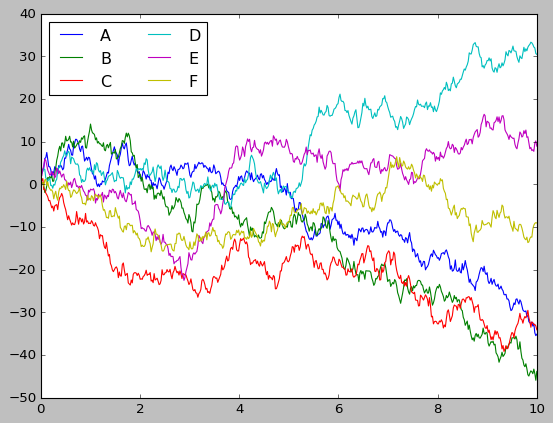

In [ ]:
# Постройте данные с настройками Matplotlib по умолчанию
plt.plot(x, y)# Строим график, используя массив x в качестве оси X и массив y в качестве оси Y
# y содержит кумулятивные суммы случайных значений для 6 различных временных рядов
plt.legend('ABCDEF', ncol=2, loc='upper left');# Добавляем легенду к графику
# 'ABCDEF' - это метки для каждой линии на графике
# ncol=2 - указывает, что легенда будет иметь 2 колонки
# loc='upper left' - задает расположение легенды в верхнем левом углу графика

Хотя результат содержит всю информацию, которую мы хотели бы передать, он делает это не так уж и эстетично и даже выглядит немного старомодно в контексте визуализации данных 21-го века.

Теперь давайте посмотрим, как это работает с Seaborn. Как мы увидим, Seaborn имеет множество собственных процедур построения графиков высокого уровня, но он также может перезаписывать параметры Matplotlib по умолчанию и, в свою очередь, получать даже простые сценарии Matplotlib для получения значительно превосходящего результата. Мы можем установить стиль, вызвав метод set() Seaborn. По соглашению Seaborn импортируется как sns:

In [ ]:
# Импортируем библиотеку Seaborn, которая предоставляет высокоуровневый интерфейс для визуализации данных
import seaborn as sns

# Устанавливаем стиль визуализации по умолчанию для графиков Seaborn
# Это позволяет улучшить внешний вид графиков, делая их более эстетичными и читаемыми
sns.set()


Теперь давайте повторим те же две строки, что и раньше:

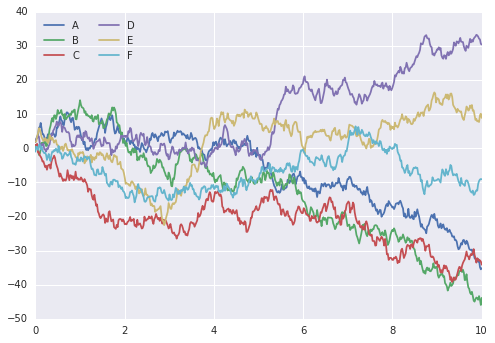

In [ ]:
# тот же код построения, что и выше!
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

Ah, much better!

## Исследование сюжетов Сиборна

Основная идея Seaborn заключается в том, что он предоставляет команды высокого уровня для создания различных типов графиков, полезных для исследования статистических данных и даже для некоторой настройки статистических моделей.

Давайте взглянем на несколько наборов данных и типов графиков, доступных в Seaborn. Обратите внимание, что все следующее *может* быть выполнено с использованием необработанных команд Matplotlib (это, по сути, то, что Seaborn делает «под капотом»), но Seaborn API гораздо удобнее.

### Гистограммы, KDE и плотности

Часто при визуализации статистических данных все, что вам нужно, — это построить гистограммы и совместные распределения переменных.
Мы видели, что в Matplotlib это относительно просто:

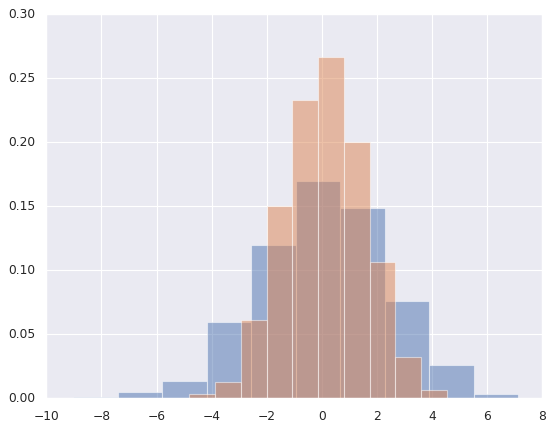

In [ ]:
# Генерируем 2000 точек из многомерного нормального распределения
# Среднее [0, 0] и ковариационная матрица [[5, 2], [2, 2]]
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)

# Преобразуем данные в DataFrame для удобства работы с ними
data = pd.DataFrame(data, columns=['x', 'y'])

# Строим гистограммы для переменных 'x' и 'y'
# normed=True (в более новых версиях лучше использовать density=True) нормализует гистограмму
# alpha=0.5 задает прозрачность столбцов
for col in 'xy':
    plt.hist(data[col], density=True, alpha=0.5)

# Так как мы дважды генерируем данные и строим гистограммы, второй блок повторяется
# Этого можно избежать, убрав дублирование

Вместо гистограммы мы можем получить плавную оценку распределения, используя оценку плотности ядра, что Сиборн делает с помощью sns.kdeplot:

<ipython-input-8-33c598ace2dc>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)
<ipython-input-8-33c598ace2dc>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)


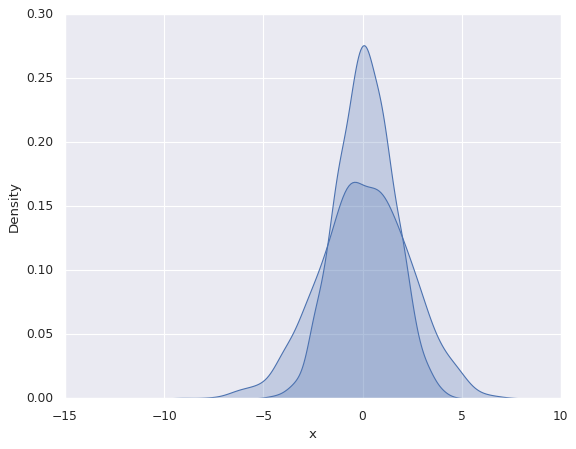

In [ ]:
# Перебираем каждую букву 'x' и 'y', представляющую колонки в данных
for col in 'xy':
    # Строим график плотности вероятности (KDE) для текущей колонки данных
    # shade=True заполняет область под кривой, делая график более наглядным
    sns.kdeplot(data[col], shade=True)


Гистограммы и KDE можно объединить с помощью distplot:

Если мы передадим полный двумерный набор данных в ``kdeplot``, мы получим двумерную визуализацию данных:

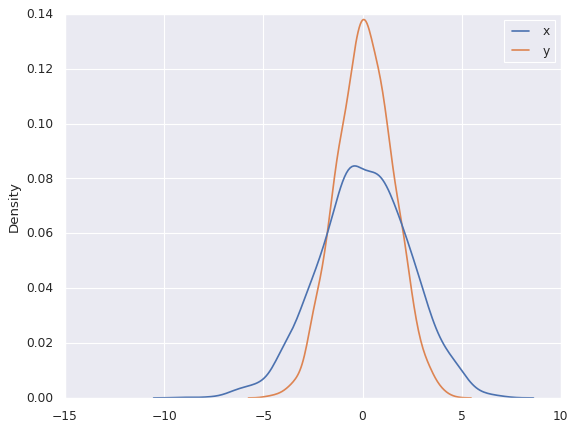

In [ ]:
sns.kdeplot(data);# Строим график оцененной плотности вероятности (KDE) для данных


Мы можем увидеть совместное распределение и предельные распределения вместе, используя sns.jointplot. Для этого графика мы установим стиль белого фона:

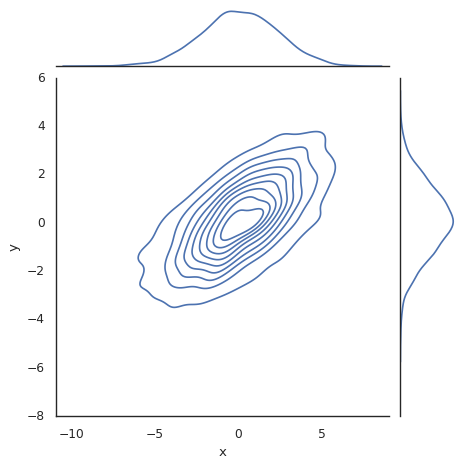

In [ ]:
# Импортируем необходимую библиотеку
import seaborn as sns  # Библиотека для визуализации данных

# Используем стиль 'white' для графика, который создает белый фон
with sns.axes_style('white'):
    # Строим совместный график (jointplot) для переменных 'x' и 'y'
    # kind='kde' указывает, что мы хотим визуализировать оценочную плотность вероятности
    sns.jointplot(x="x", y="y", data=data, kind='kde');


Есть и другие параметры, которые можно передать в Jointplot — например, вместо этого мы можем использовать шестиугольную гистограмму:

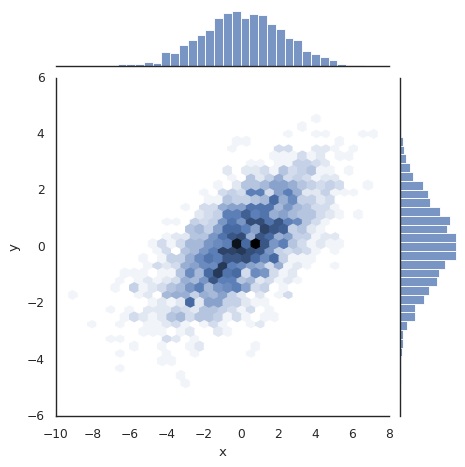

In [ ]:
# Импортируем библиотеку seaborn, если она ещё не была импортирована
import seaborn as sns  # Библиотека для визуализации данных

# Используем стиль 'white' для графика, который создает чистый белый фон
with sns.axes_style('white'):
    # Строим совместный график (jointplot) для переменных 'x' и 'y'
    # kind='hex' указывает, что мы хотим визуализировать данные в виде шестигранной плотности
    sns.jointplot(x="x", y="y", data=data, kind='hex');

### Парные графики

Когда вы обобщаете совместные графики на наборы данных большего размера, вы получаете *парные графики*. Это очень полезно для изучения корреляций между многомерными данными, когда вы хотите построить график всех пар значений друг против друга.

Мы продемонстрируем это на хорошо известном наборе данных Iris, в котором перечислены размеры лепестков и чашелистиков трех видов ирисов:

In [ ]:
# Импортируем библиотеку seaborn, необходимую для работы с набором данных
import seaborn as sns

# Загружаем набор данных "iris", который содержит информацию о различных видах ирисов
iris = sns.load_dataset("iris")

# Выводим первые пять строк загруженного набора данных для ознакомления с его структурой
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Визуализировать многомерные отношения между образцами так же просто, как вызвать sns.pairplot:

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


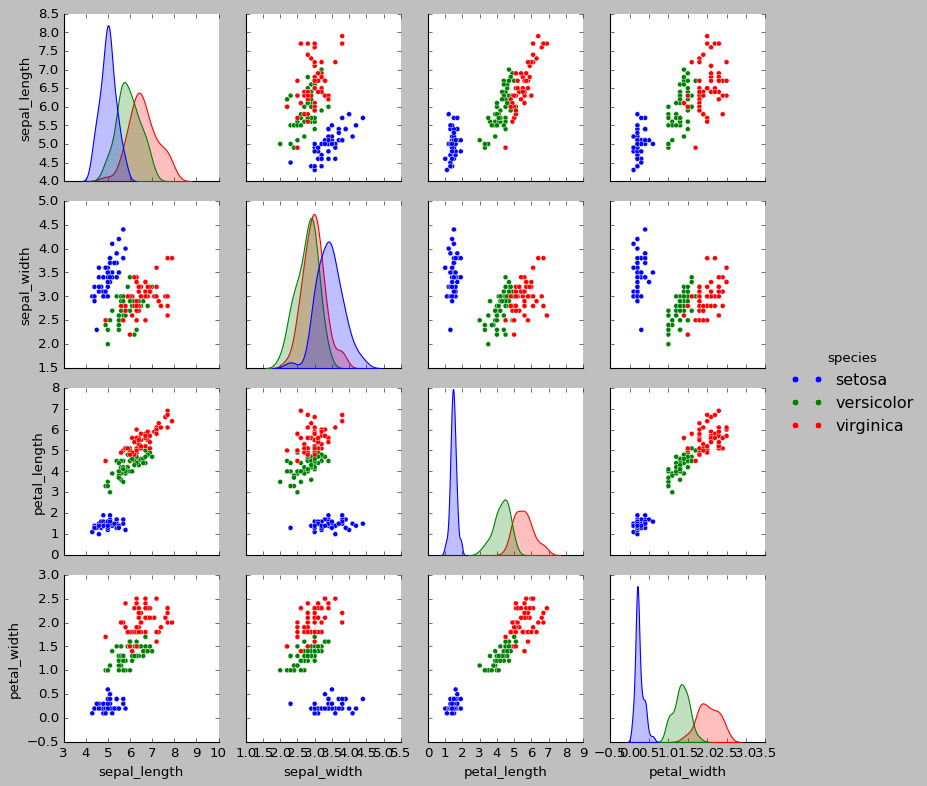

In [ ]:
sns.pairplot(iris, hue='species', size=2.5);# Создаем парные графики (pairplot) для набора данных iris
# hue='species' позволяет раскрасить точки в зависимости от вида ириса
# size=2.5 - размер каждой панели графика

### Фасетные гистограммы

Иногда лучший способ просмотра данных — это гистограммы подмножеств. FacetGrid от Seaborn делает это чрезвычайно простым.
Мы рассмотрим некоторые данные, которые показывают сумму, которую персонал ресторана получает в виде чаевых, на основе данных различных показателей:

In [ ]:
# Импортируем библиотеку seaborn, если она еще не была импортирована
import seaborn as sns

# Загружаем набор данных "tips", который содержит информацию о чаевых в ресторане
tips = sns.load_dataset('tips')

# Выводим первые пять строк загруженного набора данных для ознакомления с его структурой
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


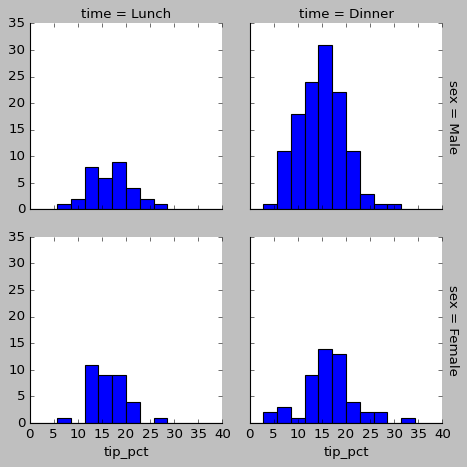

In [ ]:
# Вычисляем процент чаевых от общей суммы счета и сохраняем его в новый столбец 'tip_pct'
# Формула: (чаевые / общая сумма счета) * 100
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

# Создаем объект FacetGrid для визуализации данных
# Указываем, что строки будут разделены по полу ('sex'), а колонки - по времени ('time')
# margin_titles=True добавляет заголовки для строк и колонок
grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)

# Используем метод map для применения функции plt.hist к каждому подграфику
# Рисуем гистограмму распределения процентов чаевых ('tip_pct')
# Указываем количество корзин (bins) для гистограммы с помощью np.linspace
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));

### Факторные графики

Факторные графики также могут быть полезны для такого типа визуализации. Это позволяет просматривать распределение параметра внутри интервалов, определяемых любым другим параметром:

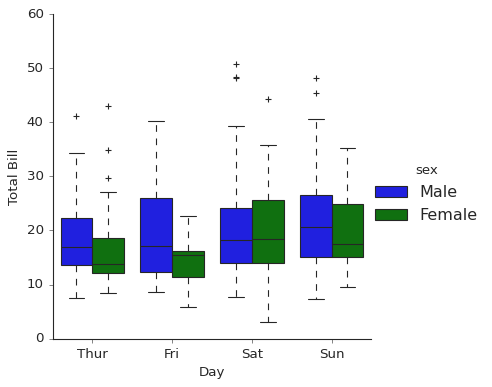

In [ ]:
# Задаем стиль осей для графиков Seaborn, устанавливая стиль 'ticks' для улучшенной визуализации
with sns.axes_style(style='ticks'):
    # Создаем факторный график с использованием функции catplot
    # "day" - категориальная переменная для оси X
    # "total_bill" - количественная переменная для оси Y
    # "sex" - переменная для разделения данных по полу
    # kind="box" указывает, что мы хотим построить боксплот
    # на выходе получаем объект типа FacetGrid
    g = sns.catplot(x="day", y="total_bill", hue="sex", data=tips, kind="box")

    # Устанавливаем метки для осей X и Y
    g.set_axis_labels("Day", "Total Bill");

### Совместные раздачи

Подобно парному графику, который мы видели ранее, мы можем использовать sns.jointplot, чтобы показать совместное распределение между различными наборами данных, а также связанные с ним маргинальные распределения:

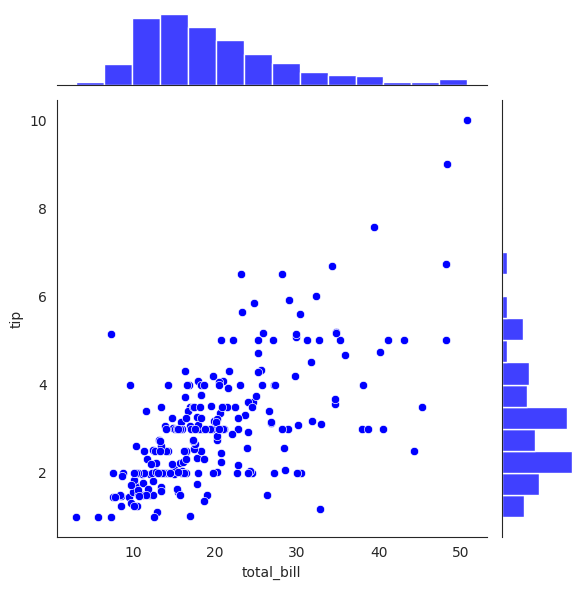

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка набора данных "tips"
tips = sns.load_dataset("tips")

# Создание совместного распределения с помощью jointplot
sns.jointplot(x="total_bill", y="tip", data=tips, kind='scatter', color='blue')

# Отображение графика
plt.show()

Совместный график может даже выполнять автоматическую оценку плотности ядра и регрессию:

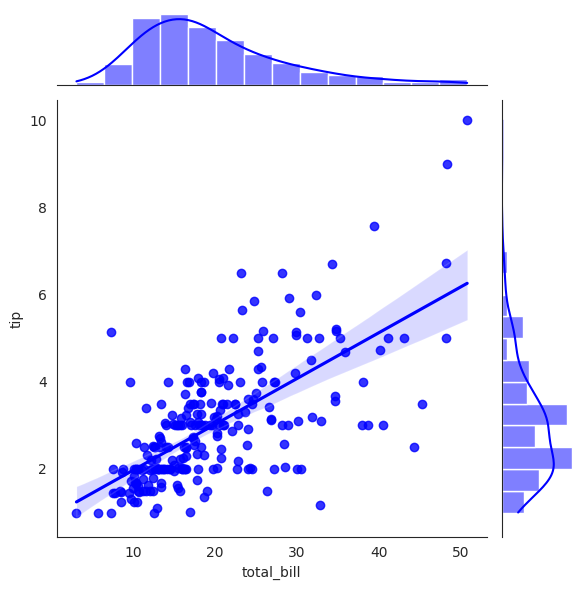

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка набора данных "tips"
tips = sns.load_dataset("tips")

# Создание совместного распределения с линейной регрессией
sns.jointplot(x="total_bill", y="tip", data=tips, kind='reg', color='blue')

# Отображение графика
plt.show()

# Барные диаграммы
Временные ряды можно построить с помощью sns.factorplot. В следующем примере мы будем использовать данные Planets, которые мы впервые увидели в [разделе Агрегация и группировка :](https://https://colab.research.google.com/drive/03.08-Aggregation-and-Grouping.ipynb)

In [ ]:
import seaborn as sns  # Импортируем библиотеку Seaborn для визуализации данных

# Загружаем встроенный набор данных 'planets' в переменную 'planets'
planets = sns.load_dataset('planets')

# Отображаем первые пять строк набора данных 'planets'
# Это позволяет быстро ознакомиться со структурами и данными в наборе
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


For more information on plotting with Seaborn, see the [Seaborn documentation](http://seaborn.pydata.org/), a [tutorial](http://seaborn.pydata.org/
tutorial.htm), and the [Seaborn gallery](http://seaborn.pydata.org/examples/index.html).

Пример: изучение времени окончания марафона
Здесь мы рассмотрим использование Seaborn для визуализации и понимания результатов марафона. Я собрал данные из источников в Интернете, агрегировал их, удалил любую идентифицирующую информацию и разместил на GitHub, где их можно скачать (если вы заинтересованы в использовании Python для очистки веб-страниц, я бы порекомендовал [веб-очистку с помощью Python](https://) от Райана Митчелла). Мы начнем с загрузки данных из Интернета и загрузки их в Pandas:

In [ ]:
# !curl -O https://raw.githubusercontent.com/jakevdp/marathon-data/master/marathon-data.csv

По умолчанию Pandas загружает столбцы времени в виде строк Python (тип объекта); мы можем увидеть это, посмотрев на атрибут dtypes DataFrame:

In [ ]:
data.dtypes #возвращает информацию о типах данных каждого столбца

age                 int64
gender             object
split     timedelta64[ns]
final     timedelta64[ns]
dtype: object

Это выглядит намного лучше. Для удобства наших утилит построения графиков Seaborn давайте добавим столбцы, в которых будет указано время в секундах:

In [ ]:
data['split_sec'] = data['split'].astype(int) / 1E9 # Преобразуем столбец 'split' в целые числа и делим на 1E9 (10^9), чтобы перевести значение из наносекунд в секунды
data['final_sec'] = data['final'].astype(int) / 1E9 # Преобразуем столбец 'final' в целые числа и делим на 1E9 (10^9), чтобы перевести значение из наносекунд в секунды
data.head() # Выводим первые несколько строк DataFrame, чтобы увидеть изменения и проверить, что все правильно

,age,gender,split,final,split_sec,final_sec
0,33,M,01:05:38,02:08:51,3938.0,7731.0
1,32,M,01:06:26,02:09:28,3986.0,7768.0
2,31,M,01:06:49,02:10:42,4009.0,7842.0
3,38,M,01:06:16,02:13:45,3976.0,8025.0
4,31,M,01:06:32,02:13:59,3992.0,8039.0


Пунктирная линия показывает, где будет находиться время человека, если он пробежит марафон в совершенно устойчивом темпе. Тот факт, что распределение находится выше этого значения, указывает (как и следовало ожидать), что большинство людей замедляют темп на марафоне.
Если вы участвовали в соревнованиях, вы знаете, что о тех, кто делает противоположное — бежит быстрее во второй половине забега, — говорят, что они «отрицательно разделили» забег.

Давайте создадим еще один столбец в данных, долю разделения, которая измеряет степень, в которой каждый бегун разделяет забег на отрицательное или положительное разделение:

In [ ]:
data['split_frac'] = 1 - 2 * data['split_sec'] / data['final_sec']# Вычисляем долю (fraction) для столбца 'split_frac'.
# Формула: 1 минус удвоенная доля (split_sec) от финального значения (final_sec).
# Это позволяет оценить, какую часть времени занимает 'split_sec' относительно 'final_sec'.
data.head()# Выводим первые несколько строк DataFrame, чтобы проверить, правильно ли добавлен новый столбец 'split_frac'.

,age,gender,split,final,split_sec,final_sec,split_frac
0,33,M,01:05:38,02:08:51,3938.0,7731.0,-0.018756
1,32,M,01:06:26,02:09:28,3986.0,7768.0,-0.026262
2,31,M,01:06:49,02:10:42,4009.0,7842.0,-0.022443
3,38,M,01:06:16,02:13:45,3976.0,8025.0,0.009097
4,31,M,01:06:32,02:13:59,3992.0,8039.0,0.006842


Если эта разница меньше нуля, человек разделил расу на эту долю отрицательно.
Давайте построим график распределения этой разделенной фракции:

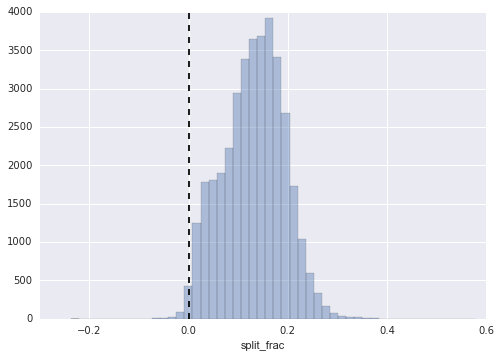

In [ ]:
sns.distplot(data['split_frac'], kde=False);# Строим гистограмму для столбца 'split_frac' из DataFrame 'data'.
# Параметр kde=False указывает, что мы не хотим отображать ядерную оценку плотности (KDE).
plt.axvline(0, color="k", linestyle="--");# Добавляем вертикальную линию на график, которая будет отмечать нулевое значение.
# Цвет линии - черный (color="k"), стиль линии - пунктирный (linestyle="--").

In [ ]:
sum(data.split_frac < 0)# Подсчитываем количество значений в столбце 'split_frac', которые меньше нуля
# 'data.split_frac < 0' создает булев массив, где True соответствует значениям < 0

251

Из почти 40 000 участников только 250 человек разделили свой марафон с отрицательным результатом.

Давайте посмотрим, есть ли какая-либо корреляция между этой дробной долей и другими переменными. Мы сделаем это, используя парную сетку, которая рисует графики всех этих корреляций:

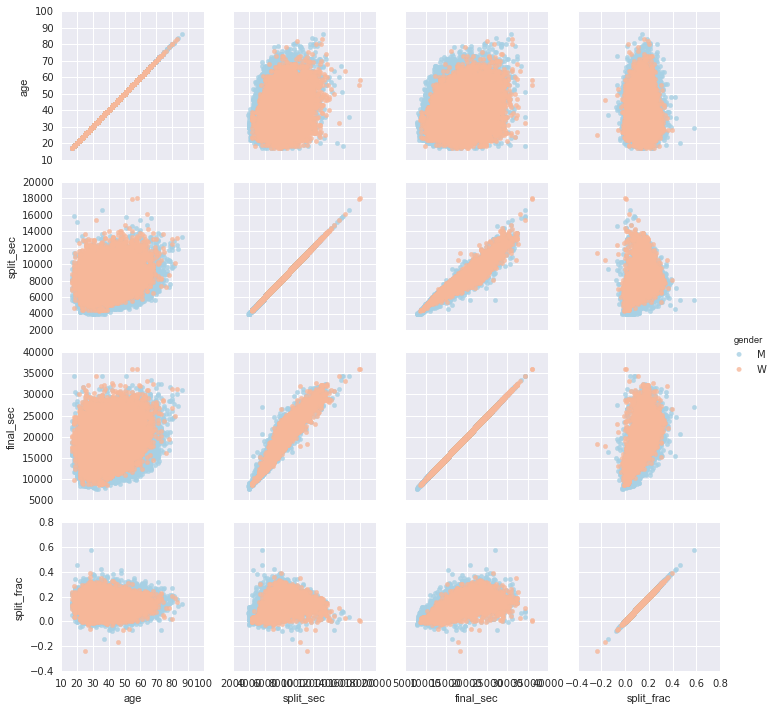

In [ ]:
g = sns.PairGrid(data, vars=['age', 'split_sec', 'final_sec', 'split_frac'],
                 hue='gender', palette='RdBu_r') # Используем цветовую палитру RdBu с обратными цветами (от красного до синего)
g.map(plt.scatter, alpha=0.8) # Используем диаграмму рассеяния для отображения точек; alpha=0.8 указывает на прозрачность точек
g.add_legend(); # Добавляем легенду к графику для идентификации категорий по цветам

Похоже, что доля разделения не особо коррелирует с возрастом, но коррелирует с итоговым временем: более быстрые бегуны, как правило, имеют более близкое к равномерному разделение времени на марафоне.
(Здесь мы видим, что Seaborn не является панацеей от проблем Matplotlib, когда дело касается стилей графиков: в частности, метки оси X перекрываются. Однако, поскольку выходные данные представляют собой простой график Matplotlib, методы в [Настройка тиков] (04.10-Customizing-Ticks.ipynb) могут быть использованы для настройки таких вещей, если это необходимо.)

Разница между мужчинами и женщинами здесь интересна. Давайте посмотрим на гистограмму дробных фракций для этих двух групп:

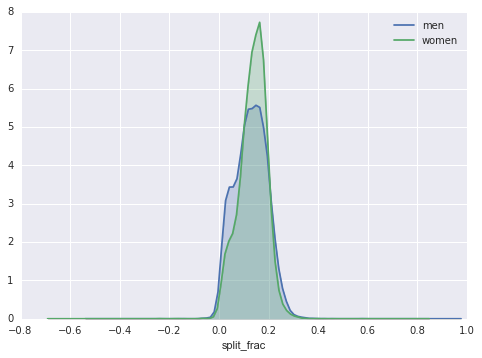

In [ ]:
sns.kdeplot(data.split_frac[data.gender=='M'], label='men', shade=True) # Выбираем значения 'split_frac' для категорий 'M' (мужчины)
sns.kdeplot(data.split_frac[data.gender=='W'], label='women', shade=True)# Выбираем значения 'split_frac' для категорий 'W' (женщины)
plt.xlabel('split_frac');# Подписываем ось X, указывая, что по ней представлены значения 'split_frac'

Интересно то, что мужчин, которые баллотируются почти поровну, гораздо больше, чем женщин!
Это почти похоже на некое бимодальное распределение среди мужчин и женщин. Давайте посмотрим, сможем ли мы разобраться в том, что происходит, взглянув на распределение в зависимости от возраста.

Хороший способ сравнить распределения — использовать *скрипичный график*.

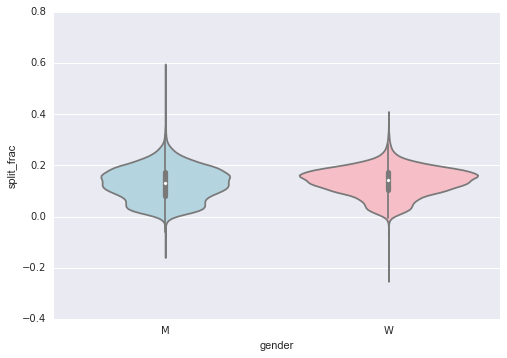

In [ ]:
sns.violinplot("gender", "split_frac", data=data,
               palette=["lightblue", "lightpink"]);# Создаем график виолончельной диаграммы (violin plot)

Это еще один способ сравнить распределение между мужчинами и женщинами.

Давайте посмотрим немного глубже и сравним эти скрипичные сюжеты в зависимости от возраста. Начнем с создания нового столбца в массиве, в котором будет указано десятилетие возраста каждого человека:

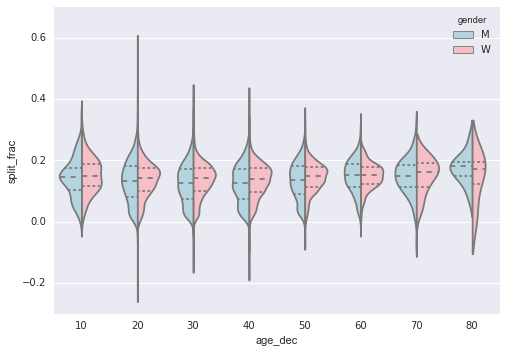

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Предполагаем, что ваш DataFrame называется "data"

# Установка стиля графиков, можно использовать 'whitegrid' или оставить None
with sns.axes_style('whitegrid'):
    sns.violinplot(x="age_dec", y="split_frac", hue="gender", data=data,
                   split=True, inner="quartile",
                   palette={"M": "lightblue", "W": "lightpink"})  # Обновлено для указания цветов по категориям

# Отображение графика
plt.show()

Глядя на это, мы можем увидеть, где различаются распределения мужчин и женщин: распределение мужчин в возрасте от 20 до 50 лет демонстрирует явно выраженную чрезмерную плотность в сторону более низкого разделения по сравнению с женщинами того же возраста (или любого возраста, если уж на то пошло).

Также удивительно, что 80-летние женщины, кажется, превосходят *всех* с точки зрения своего промежуточного времени. Вероятно, это связано с тем, что мы оцениваем распределение по небольшим числам, поскольку в этом диапазоне всего несколько бегунов:

Вернемся к мужчинам с отрицательным сплитом: кто эти бегуны? Коррелирует ли эта дробная часть с быстрым завершением? Мы можем это очень легко построить. Мы будем использовать regplot, который автоматически подгонит линейную регрессию к данным.

Судя по всему, люди с быстрым шпагатом — это элитные бегуны, которые финишируют примерно за 15 000 секунд, или около 4 часов. У людей, которые медленнее этого, гораздо меньше шансов получить быстрый второй сплит.

<!--NAVIGATION-->
< [Geographic Data with Basemap](04.13-Geographic-Data-With-Basemap.ipynb) | [Contents](Index.ipynb) | [Further Resources](04.15-Further-Resources.ipynb) >

<a href="https://colab.research.google.com/github/cpearce/PythonDataScienceHandbook/blob/master/notebooks/04.14-Visualization-With-Seaborn.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
